<a href="https://colab.research.google.com/github/maiali13/DS-Unit-1-Sprint-2-Statistics/blob/master/M_Ali_LS_DS13_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, need 1 more value):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?






In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# True Positive 100%
p_pos_user = 1
# Prior Probability
p_user = 1/1000
# False Positive 8%
p_pos_non_user = .08
# Complement of prior
p_non_user = 1 - p_user

In [0]:
#What is the probability that a person is drunk after one positive breathalyzer test?

numerator = p_pos_user*p_user
denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)

# aka posterior probability
posterior1 = numerator / denominator

posterior1

0.012357884330202669

In [0]:
#What is the probability that a person is drunk after two positive breathalyzer tests?
# True Positive Rate: 100%
p_pos_user = 1
# Prior Probability -> the posterior prob. from the first test
p_user = posterior1
# False Positive Rate: 8%
p_pos_non_user = .08
# Complement of prior
p_non_user = 1 - p_user

numerator = p_pos_user*p_user
denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)

# second posterior probability
posterior2 = numerator / denominator

posterior2

0.13525210993291495

In [0]:
# prob_drunk_given_positive(1/1000,.08,1.0)
def bayes_rule(p_user, p_pos_non_user, p_pos_user):
  p_non_user = 1 - p_user

  numerator = p_pos_user*p_user
  denominator = (p_pos_user)*(p_user) + (p_pos_non_user)*(p_non_user)

  return (numerator / denominator)

bayes_rule(1/1000, .08, 1)

0.012357884330202669

In [0]:
#How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?
prior = 1/1000
p_drunk_post = []
for drug_test in range(0,11):
  prior = bayes_rule(prior,.08,1.0)
  p_drunk_post.append(prior)

p_drunk_post
#4 tests!

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192,
 0.9999999991418655]

Text(0, 0.5, 'probability of intoxication above the legal limit')

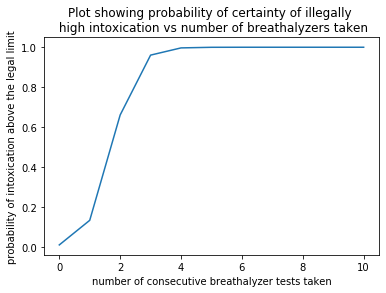

In [0]:
plt.plot(p_drunk_post)
plt.title('Plot showing probability of certainty of illegally \n high intoxication vs number of breathalyzers taken')
plt.xlabel('number of consecutive breathalyzer tests taken')
plt.ylabel('probability of intoxication above the legal limit')


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [0]:
#?stats.bayes_mvs()

In [0]:
oinflips = np.random.binomial(n=1, p=.05, size=1000000)
coinflips

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
np.mean(coinflips)

0.050199

In [0]:
#frequentist CI of our 1m coinflips
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean-interval, mean, mean+interval)

ci_coins = confidence_interval(coinflips)
print(ci_coins)

(0.04977103063933846, 0.050199, 0.05062696936066154)


In [0]:
#beysian CI for our 1m coinflips
CI, _, _ = stats.bayes_mvs(coinflips, alpha=.95)
bs_coins = pd.DataFrame(CI).T
print(bs_coins)

          0                                             1
0  0.050199  (0.049771031371322445, 0.050626968628677556)


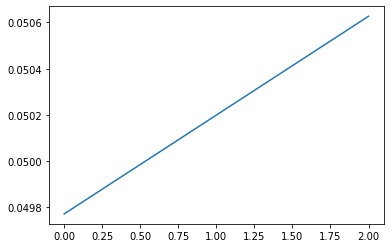

In [0]:
plt.plot(ci_coins)
#Frequentist CI visual

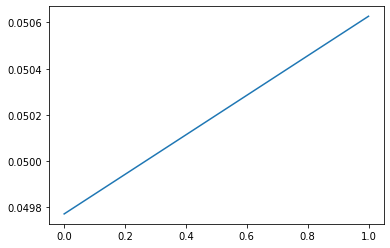

In [0]:
plt.plot(bs_coins.iloc[0,1])
#Bayesian CI visual

In [0]:
#both CI are the same, as predicted due to large sample size

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

Bayseian and Frequentist statistical methods approach data from different philosophical viewpoints. Frequentists are highly dependent on sampling. They consider the true value of the data as an unknown, and attempt to capture it somwhere within the interval. The process is to figure out if the frequency of the true value is rare enough (<.05) to declare the null hypothesis false. However, a Beysian approaches the data from almost the opposite mindset, by trying to find the distribution of the parameter (not fixed) and then report the 95% most likeley outocmes of the parameter's distribution. This means that the initial sample quality is of significantly less importance. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

**- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.**
**- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective**
**- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples**
- Take PyMC3 further - see if you can build something with it!